## Goal: 
Quantify the impact a different translation has on convention rate
## Hypotheses:
[list]Compared with original websites, the new translated website will appeal more user to convente
Null hypothesis:
New translated website will cause no difference in the convention rate of websites
## Treatment & Control
Control group will use the origin website.
Treatment group will brouse with the new translated website.
## Key metrics to measure
Convention Rate

In [126]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import numpy as np

In [127]:
test = pd.read_csv('../DS-Take-Home-master/test_table.csv')

In [128]:
user = pd.read_csv('../DS-Take-Home-master/user_table.csv')

In [129]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [130]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [131]:
user.describe(include = 'all')

,user_id,sex,age,country
count,452867.000000,452867,452867.000000,452867
unique,NaN,2,NaN,17
top,NaN,M,NaN,Mexico
freq,NaN,264485,NaN,128484
mean,499944.805166,NaN,27.130740,NaN
std,288676.264784,NaN,6.776678,NaN
min,1.000000,NaN,18.000000,NaN
25%,249819.000000,NaN,22.000000,NaN
50%,500019.000000,NaN,26.000000,NaN
75%,749543.000000,NaN,31.000000,NaN


In [132]:
### From the fig, we can see most frequent gender of user is male and user's age is range from 18 to 70.

In [133]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [134]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           453321 non-null  int64 
 1   date              453321 non-null  object
 2   source            453321 non-null  object
 3   device            453321 non-null  object
 4   browser_language  453321 non-null  object
 5   ads_channel       181877 non-null  object
 6   browser           453321 non-null  object
 7   conversion        453321 non-null  int64 
 8   test              453321 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 31.1+ MB


In [135]:
test.describe(include = 'all')

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
count,453321.000000,453321,453321,453321,453321,181877,453321,453321.000000,453321.000000
unique,NaN,5,3,2,3,5,7,NaN,NaN
top,NaN,2015-12-04,Ads,Web,ES,Facebook,Android_App,NaN,NaN
freq,NaN,141163,181877,251565,377547,68425,155135,NaN,NaN
mean,499937.514728,NaN,NaN,NaN,NaN,NaN,NaN,0.049579,0.476446
std,288665.193436,NaN,NaN,NaN,NaN,NaN,NaN,0.217073,0.499445
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,249816.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
50%,500019.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
75%,749522.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000


In [136]:
test[test.test ==1].head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1


In [137]:
user[user.user_id == 497851]

,user_id,sex,age,country
158860,497851,M,21,Mexico


### check whether have duplicates

In [138]:
len(user.user_id.unique()) == len(user)

True

In [139]:
len(test.user_id.unique()) == len(test)

True

In [140]:
data = pd.merge(left = test, right = user, how = 'left', on = 'user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           453321 non-null  int64  
 1   date              453321 non-null  object 
 2   source            453321 non-null  object 
 3   device            453321 non-null  object 
 4   browser_language  453321 non-null  object 
 5   ads_channel       181877 non-null  object 
 6   browser           453321 non-null  object 
 7   conversion        453321 non-null  int64  
 8   test              453321 non-null  int64  
 9   sex               452867 non-null  object 
 10  age               452867 non-null  float64
 11  country           452867 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 45.0+ MB


In [167]:
data.groupby('date').count()

,user_id,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
date,,,,,,,,,,,
2015-11-30,71025,71025,71025,71025,28485,71025,71025,71025,70948,70948,70948
2015-12-01,70991,70991,70991,70991,28579,70991,70991,70991,70915,70915,70915
2015-12-02,70649,70649,70649,70649,28443,70649,70649,70649,70581,70581,70581
2015-12-03,99493,99493,99493,99493,39705,99493,99493,99493,99399,99399,99399
2015-12-04,141163,141163,141163,141163,56665,141163,141163,141163,141024,141024,141024


### A/B testing

In [142]:
def CR(group):
    CR = data.groupby(['test',group])['conversion'].mean().reset_index(name='Conversion Rate')
    CR = CR.sort_values('Conversion Rate', ascending = False)
    fig,ax = plt.subplots(figsize = (18,6))
    sns.barplot(x = group, y = 'Conversion Rate', hue = 'test',data = CR, ax = ax)
    plt.title('Conversion Rate by {}'.format(group))
    plt.show()

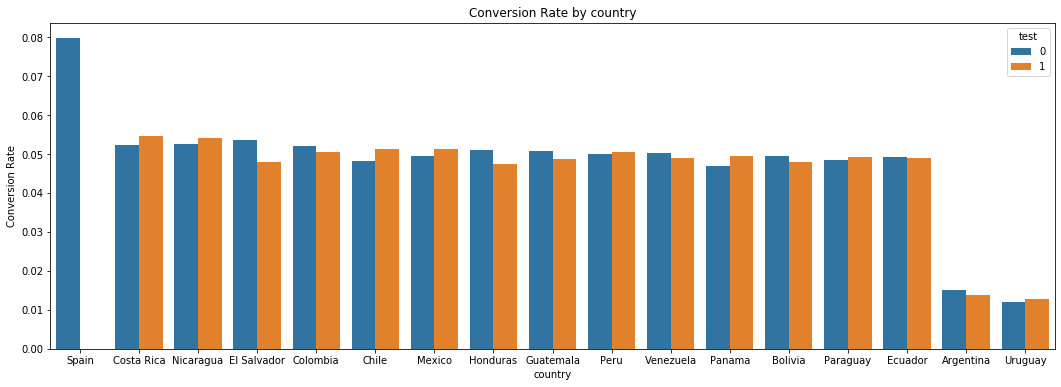

In [143]:
CR('country')

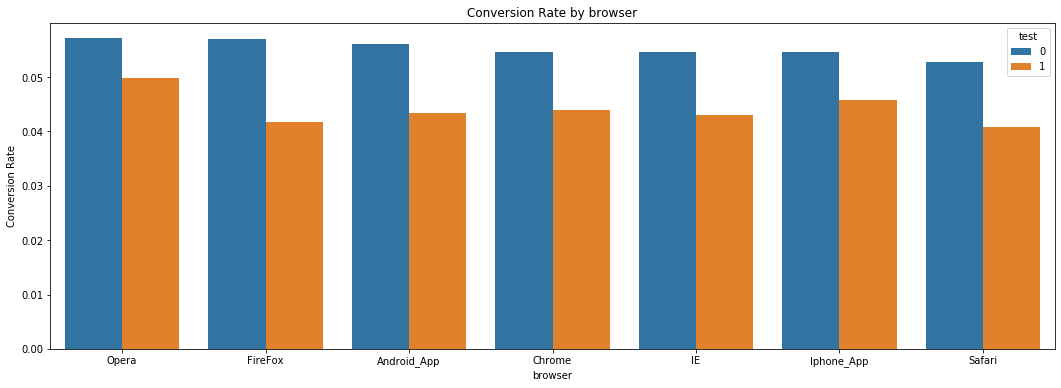

In [144]:
# change for brower
CR('browser')

### it seems like for different browser when using new translate the conversion rate goes down.

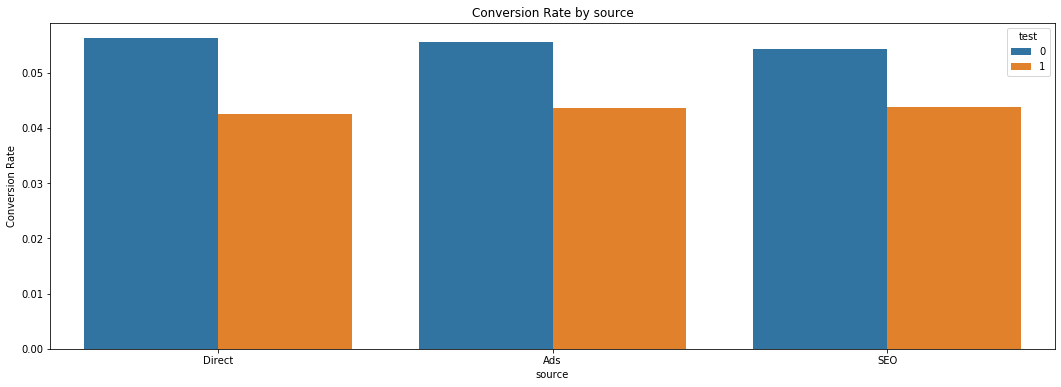

In [145]:
# change for source
CR('source')

### seem like browser new translated website has negative impact on conversion rate

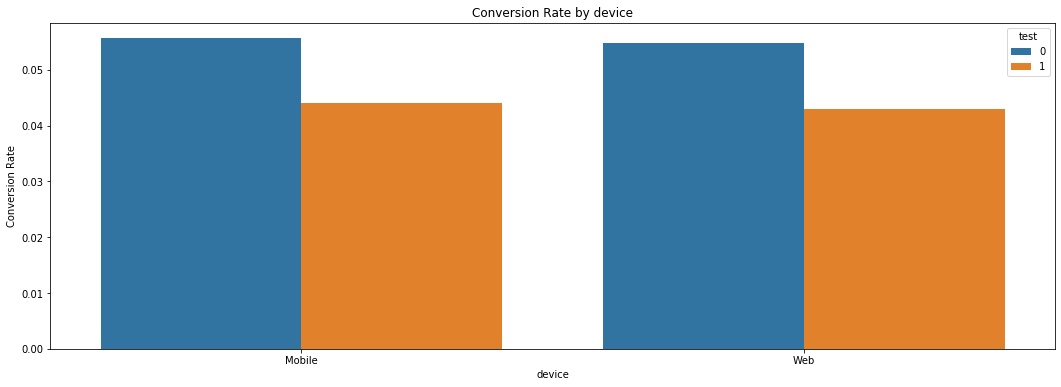

In [146]:
CR('device')

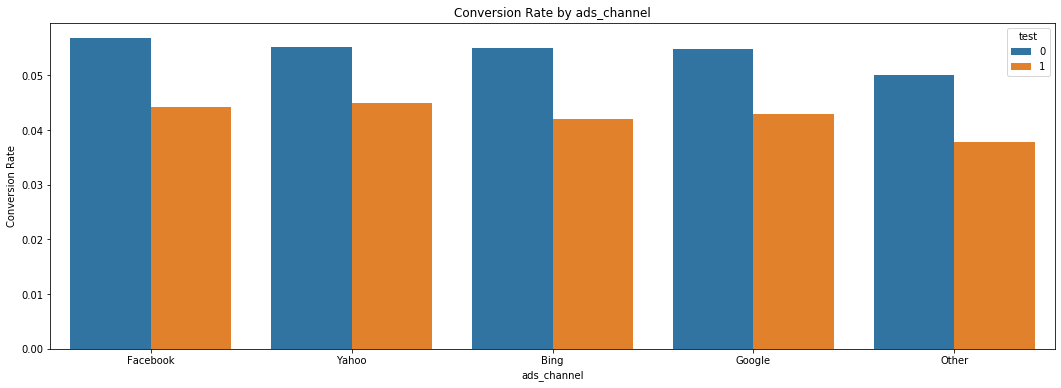

In [147]:
CR('ads_channel')

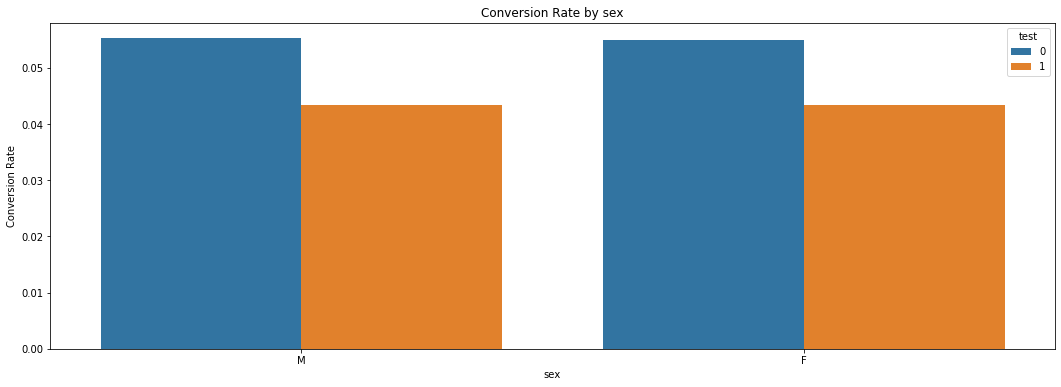

In [148]:
CR('sex')

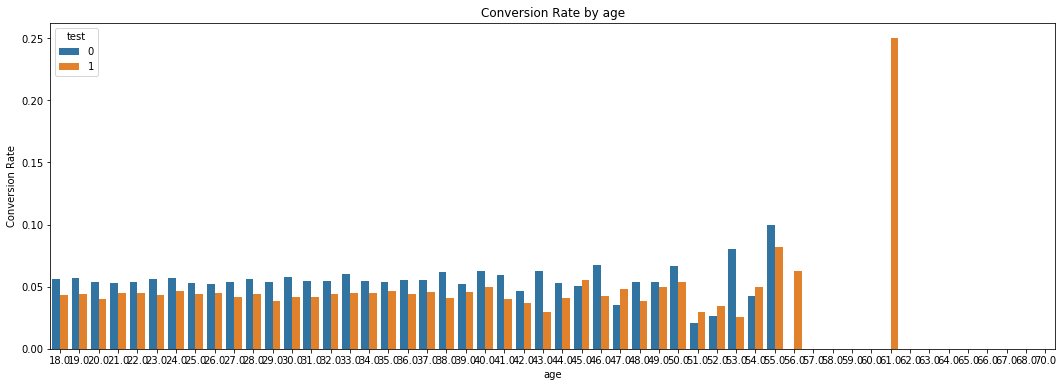

In [149]:
CR('age')

In [150]:
### other_country means exclude Spain
other_country= data[data.country != 'Spain']
test_val = other_country[other_country.test==1]['conversion'].values
cont_val = other_country[other_country.test ==0]['conversion'].values

In [151]:
print(ttest_ind(test_val, cont_val,equal_var = False))

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


In [152]:
new = data.copy()

In [153]:
country = list(data[data['country'].notnull()]['country'].unique())

In [154]:
def res(x):
    test =  data[(data.country==x) & (data.test==1)]['conversion']
    cont = data[(data.country==x)&( data.test==0)]['conversion']
    return test,cont

In [155]:
pvalue = list(map(lambda x: ttest_ind(res(x)[0],res(x)[1] ,equal_var=False).pvalue,country))

In [156]:
Test_Rate = list(map(lambda x:res(x)[0].mean(),country))

In [157]:
Control_Rate = list(map(lambda x:res(x)[1].mean(),country))

In [158]:
result =pd.DataFrame(zip(country,pvalue,Test_Rate,Control_Rate),columns=['country','pvalue','test rate','control rate'])

In [159]:
result

,country,pvalue,test rate,control rate
0,Spain,NaN,NaN,0.079719
1,Mexico,0.165544,0.051186,0.049495
2,Venezuela,0.573702,0.048978,0.050344
3,Bolivia,0.718885,0.047901,0.049369
4,Colombia,0.423719,0.050571,0.052089
5,Uruguay,0.879764,0.012907,0.012048
6,El Salvador,0.248127,0.047947,0.053554
7,Nicaragua,0.780400,0.054177,0.052647
8,Peru,0.771953,0.050604,0.049914
9,Costa Rica,0.687876,0.054738,0.052256
